<a href="https://colab.research.google.com/github/Saitejamacha/Data_Science_-_AI_ML/blob/main/Hierarchical_Clustering_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Importing the required packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#clustering related packages
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

### **2. Reading and Exploring the data**

In [ ]:
customers = pd.read_csv('Mall_Customers.csv')

In [ ]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customers.drop(columns = 'CustomerID', inplace = True)

In [ ]:
customers.dtypes  #check the datatype of values present in each column

,0
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [ ]:
customers.isnull().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
customers.duplicated().sum()  #print the total number of duplicate rows

np.int64(0)

In [ ]:
customers.drop_duplicates(inplace = True)

#### **Encoding the Gender column**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

customers['Gender'] = le.fit_transform(customers['Gender'])

#### **Check for the outliers and deal with them**

In [ ]:
customers.describe()  #statistical description of the data which can also be used to identify the outliers

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


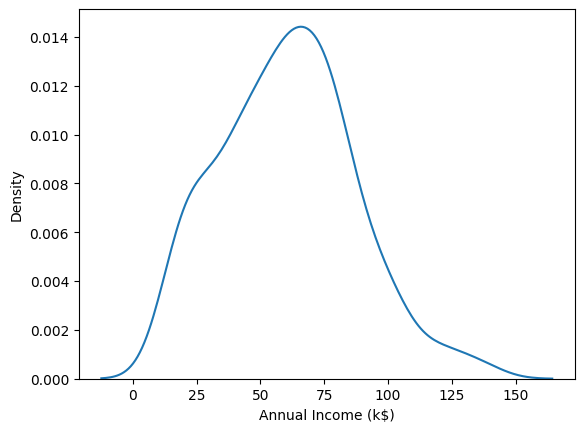

In [ ]:
sns.kdeplot(x = 'Annual Income (k$)', data = customers)
plt.show()

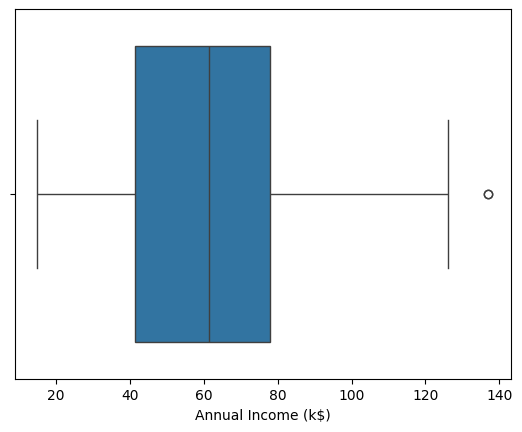

In [ ]:
sns.boxplot(x = 'Annual Income (k$)', data = customers)
plt.show()

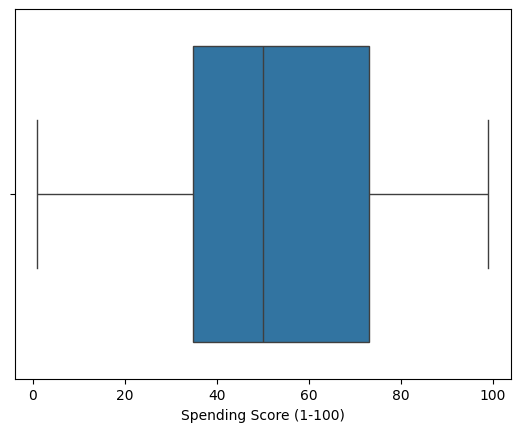

In [ ]:
sns.boxplot(x = 'Spending Score (1-100)', data = customers)
plt.show()

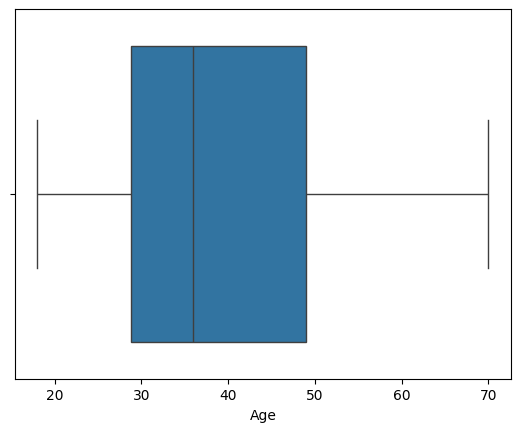

In [ ]:
sns.boxplot(x = 'Age', data = customers)
plt.show()

#### **To deal with the outliers we have two options:**

1. Remove the outliers.
2. We can transform the data so the effect of the outlier is neutralized.
    - Log Transformation
    - Square root Transformation
    - Box Cox Transformation

In [ ]:
#square root transformation
customers['Annual Income sqrt'] = np.sqrt(customers['Annual Income (k$)'])

In [ ]:
customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income sqrt
0,1,19,15,39,3.872983
1,1,21,15,81,3.872983
2,0,20,16,6,4.000000
3,0,23,16,77,4.000000
4,0,31,17,40,4.123106


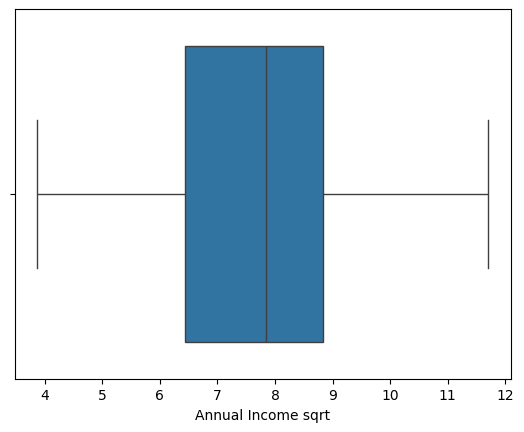

In [ ]:
sns.boxplot(x = 'Annual Income sqrt', data = customers)
plt.show()

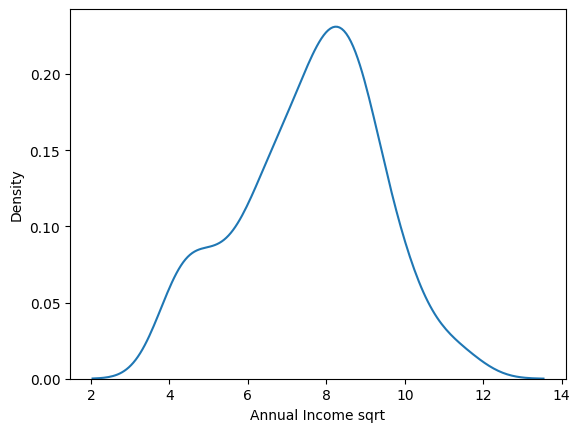

In [ ]:
sns.kdeplot(x = 'Annual Income sqrt', data = customers)
plt.show()

### **Machine Learning Process**

In [ ]:
customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income sqrt
0,1,19,15,39,3.872983
1,1,21,15,81,3.872983
2,0,20,16,6,4.000000
3,0,23,16,77,4.000000
4,0,31,17,40,4.123106


In [ ]:
X = customers.drop(columns = 'Annual Income sqrt').values

#### **Make the dendrogram using the linkage process**

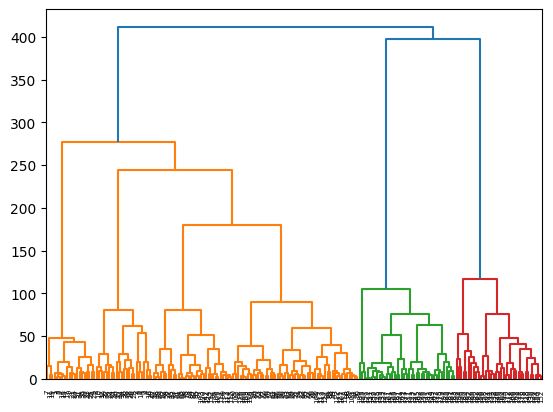

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

#### **Observation** : The best linkage method is ward on this data and optimal number of clusters is 3.

#### **Apply the Agglomerative Clustering on the data**

In [ ]:
agg_cluster = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')

y = agg_cluster.fit_predict(X)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [ ]:
output = pd.DataFrame(y, columns = ['Cluster Number'])

In [ ]:
pd.concat([customers, output], axis = 1)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income sqrt,Cluster Number
0,1,19,15,39,3.872983,0
1,1,21,15,81,3.872983,0
2,0,20,16,6,4.000000,0
3,0,23,16,77,4.000000,0
4,0,31,17,40,4.123106,0
...,...,...,...,...,...,...
195,0,35,120,79,10.954451,2
196,0,45,126,28,11.224972,1
197,1,32,126,74,11.224972,2
198,1,32,137,18,11.704700,1
